# Homework 4 Question 1 (Value Function Iteration)

In [1]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from operator import itemgetter
from mpl_toolkits.mplot3d import Axes3D
import math
from math import exp
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from math import log
plt.style.use("ggplot")

In [2]:
theta = 0.679
beta = 0.988
delta = 0.013
h = 1
k = 1
kappa = 5.24
v = 2.0

## 1 a)

In [3]:
#Labor Fixed
def m(ki, kj):
    h=1
    c = ki**(1-theta)*h**theta+(1-delta)-kj
    #Step 4 (consumption must be non negative)
    if c >= 0:
        return math.log(c) - kappa*(1/(1+1/v))
    else:
        return -10000000

In [66]:
%%time
### Inefficient version
# p = 100, k_max = 2 ====>>> 13sekund
k_min = 0.01
k_max = 2
p = 5


#Step a) Compute the m ≥ n + 1 Chebyshev interpolation nodes in [−1, 1]:
z1 = np.zeros(p)
i=1
while i <= p:
    z1[i-1] = -math.cos((2*i-1)/(2*p)*math.pi)
    i+=1


#Step b) Adjust nodes to [a, b] intervals:
k = np.zeros(p)
i=1
while i <= p:
    k[i-1] = (z1[i-1] + 1)*((k_max-k_min)/2)
    i += 1


    
#Step c) Evaluate f at the approximation nodes: wk = f (xk ), k = 1, ..., m.
#y1 = np.exp(1/k)
    
    
#Step 1
#k = np.linspace(k_min, k_max, p) #The continuous variable k is discretized by defining a grid for the values of k

#Step 2
V = []
V.append(np.zeros(p)) #Guess a solution
V.append(np.zeros(p))
k_dec = []
k_dec.append(np.zeros(p))
kj_dec = []
kj_dec.append(np.zeros(p))
#kj_dec.append(np.zeros(p))
#Step 3
#Define the return matrix M

M = [0]*p
Chi = [0]*p
for i in range(p):
    M[i] = [0] * p
    Chi[i] = [0] * p
    
    
for i in range(p):
    for j in range(p):
        M[i][j] = m(k[i], k[j])



for i in range(p):
    for j in range(p):
        Chi[i][j] = M[i][j] + beta* V[-1][j]

#STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
V_new = [0]*p
k_dec_new = [0]*p
for i in range(p):
    V_new[i]=max(Chi[i])
    #k_dec_new[i] = argmax(Chi[i])

V.append(V_new)

#check = True

while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 0.01): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
    #check = False
    #STEP 5.1: Compute the matrix, χ
    for i in range(p):
        for j in range(p):
            Chi[i][j] = m(k[i], k[j]) + beta* V[-1][j]
    
    #STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
    V_new = [0]*p
    k_dec_new = [0]*p
    for i in range(p):
        V_new[i]=max(Chi[i])
        #k_dec_new[i] = argmax(Chi[i])

    V.append(V_new)
    #k_dec.append(Chi.argmax(1))
    #kj_dec.append(k[k_dec[-1]])

Wall time: 46.9 ms


In [67]:
V[-1]

[-267.4302388860591,
 -267.1014208130267,
 -266.93072336492435,
 -266.8341393374302,
 -266.78951067550486]

In [68]:
k

array([0.04869877, 0.41015367, 0.995     , 1.57984633, 1.94130123])

In [74]:
theta_dash

array([-267.01720662, -178.80329115,  -43.02896007,  -13.60831782,
         -3.86258552,   -1.0462071 ])

In [69]:
def cheb(n,x):
    cz = np.polynomial.chebyshev.Chebyshev((int(0==n),int(1==n),int(2==n),int(3==n),int(4==n),int(5==n),int(6==n),int(7==n),int(8==n),int(9==n),int(10==n)))
    return cz(x)

In [75]:
#Step d) Compute Chebyshev coefficients, theta(i), associated with Chebyshev basis i = 0, ..., n:
theta_dash = np.zeros(p+1)

for i in range(p+1):
    sumNom = 0
    sumDen = 0
    for j in range(p):
        sumNom = sumNom + V[-1][j]*cheb(i,k[j])
        sumDen = sumDen + cheb(i,k[j])*cheb(i,k[j])
    theta_dash[i] = sumNom/sumDen

In [76]:
theta_dash

array([-267.01720662, -178.80329115,  -43.02896007,  -13.60831782,
         -3.86258552,   -1.0462071 ])

In [71]:
#to arrive at the approximation for f (x), x ∈ [a, b]:
#X = np.linspace(0,1,100)
Y = np.zeros(p)

for ii in range(p):
    f=0
    for i in range(p+1):
         f = f + theta_dash[i]*cheb(i, k[ii])
    Y[ii] = f

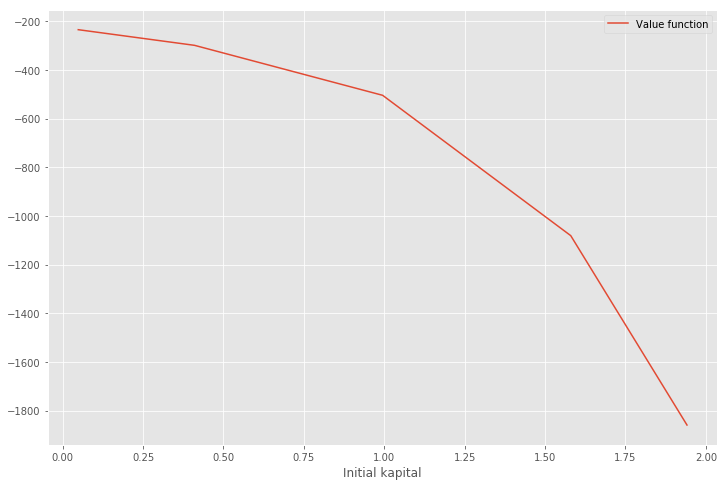

In [72]:
def plot1A():
    plt.plot(k, Y, label='Value function')
    plt.legend()
    plt.rcParams["figure.figsize"] = (12,8)
    plt.xlabel('Initial kapital')
    
plot1A()

# 1b) monotonicity

In [119]:
%%time
# p = 100 , k_max = 2 ====>>> 5,5sekund

k_min = 0.01
k_max = 2
p = 50

#Step 1
k = np.linspace(k_min, k_max, p) #The continuous variable k is discretized by defining a grid for the values of k

#Step 2
V = []
V.append(np.zeros(p)) #Guess a solution
V.append(np.zeros(p))
k_dec = []
k_dec.append(np.zeros(p))

kj_dec = []
kj_dec.append(np.zeros(p))


#Step 3
#Define the return matrix M
M = [0]*p
Chi = [0]*p
for i in range(p):
    M[i] = [0] * p
    Chi[i] = [0] * p
    
    
for i in range(p):
    for j in range(p):
        M[i][j] = m(k[i], k[j])



for i in range(p):
    for j in range(p):
        Chi[i][j] = M[i][j] + beta* V[-1][j]

#STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
V_new = [0]*p
k_dec_new = [0]*p
for i in range(p):
    V_new[i]=max(Chi[i])
    #k_dec_new[i] = argmax(Chi[i])

V.append(V_new)

#check = True

while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 0.01): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
    #check = False
    #STEP 5.1: Compute the matrix, χ
    for i in range(p):
        for j in range(p):
            if k[j]>=k_dec[-1][j]:
                Chi[i][j] =M[i][j] + beta* V[-1][j]

    
    #STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
    V_new = [0]*p
    k_dec_new = [0]*p
    for i in range(p):
        V_new[i]=max(Chi[i])
        #k_dec_new[i] = argmax(Chi[i])

    V.append(V_new)
    #k_dec.append(Chi.argmax(1))
    #kj_dec.append(k[k_dec[-1]])

Wall time: 1.26 s


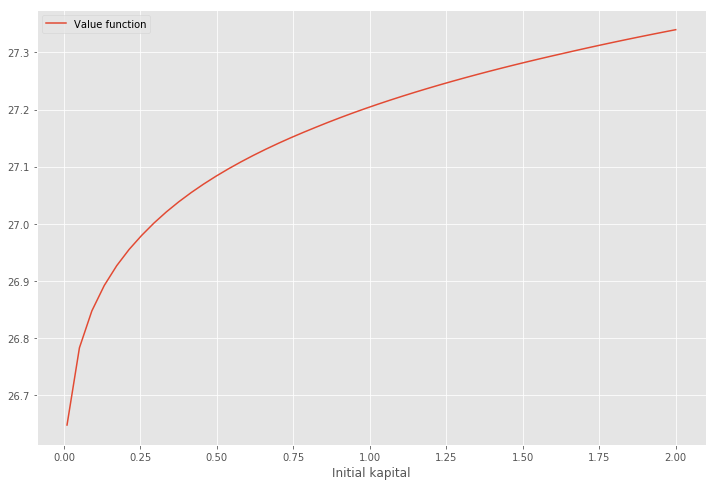

In [30]:
def plot1B():
    plt.plot(k, V[-1], label='Value function')
    plt.legend()
    plt.rcParams["figure.figsize"] = (12,8)
    plt.xlabel('Initial kapital')
    
plot1A()

# 1 c) concavity

In [124]:
%%time
# p = 100 , k_max = 2 ====>>> 1,4 sekund
Cond = True
k_min = 0.01
k_max = 2
p = 50

#Step 1
k = np.linspace(k_min, k_max, p) #The continuous variable k is discretized by defining a grid for the values of k

#Step 2
V = []
V.append(np.zeros(p)) #Guess a solution
V.append(np.zeros(p))
k_dec = []
k_dec.append(np.zeros(p))

kj_dec = []
kj_dec.append(np.zeros(p))


#Step 3
#Define the return matrix M
M = [0]*p
Chi = [0]*p
for i in range(p):
    M[i] = [0] * p
    Chi[i] = [0] * p
    
    
for i in range(p):
    for j in range(p):
        M[i][j] = m(k[i], k[j])



for i in range(p):
    for j in range(p):
        Chi[i][j] = M[i][j] + beta* V[-1][j]

#STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
V_new = [0]*p
k_dec_new = [0]*p
for i in range(p):
    V_new[i]=max(Chi[i])
    #k_dec_new[i] = argmax(Chi[i])

V.append(V_new)

#check = True

while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 0.01): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
    #check = False
    #STEP 5.1: Compute the matrix, χ
    for i in range(p):
        j=0
        while j<p:
            Chi[i][j] =M[i][j] + beta* V[-1][j]
            if j>0:
                if Chi[i][j]<Chi[i][j-1]:
                    j=p
            j = j+1
            
     
        
    
    #STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
    V_new = [0]*p
    k_dec_new = [0]*p
    for i in range(p):
        V_new[i]=max(Chi[i])
        #k_dec_new[i] = argmax(Chi[i])

    V.append(V_new)
    #k_dec.append(Chi.argmax(1))
    #kj_dec.append(k[k_dec[-1]])

Wall time: 244 ms


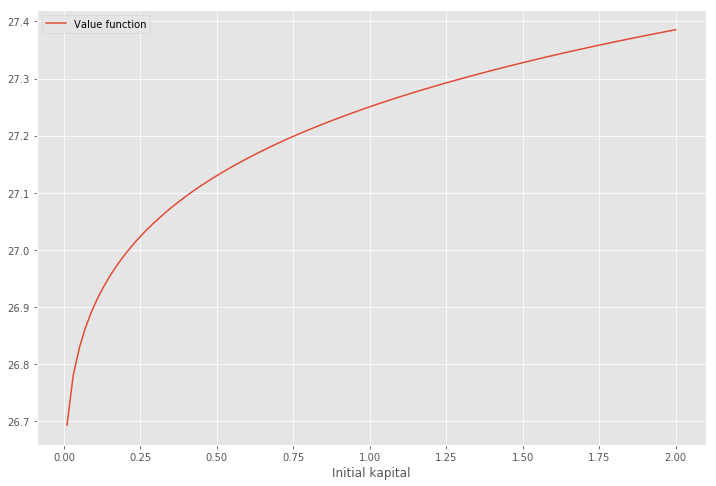

In [59]:
def plot1C():
    plt.plot(k, V[-1], label='Value function')
    plt.legend()
    plt.rcParams["figure.figsize"] = (12,8)
    plt.xlabel('Initial kapital')
    
plot1C()

# 1 d) local search

In [128]:
%%time
# p = 100 , k_max = 2 ====>>> 0,9 sekund
Cond = True
k_min = 0.01
k_max = 2
p = 50

#Step 1
k = np.linspace(k_min, k_max, p) #The continuous variable k is discretized by defining a grid for the values of k

#Step 2
V = []
V.append(np.zeros(p)) #Guess a solution
V.append(np.zeros(p))
k_dec = []
k_dec.append(np.zeros(p))

kj_dec = []
kj_dec.append(np.zeros(p))


#Step 3
#Define the return matrix M
M = [0]*p
Chi = [0]*p
for i in range(p):
    M[i] = [0] * p
    Chi[i] = [0] * p
    
    
for i in range(p):
    for j in range(p):
        M[i][j] = m(k[i], k[j])



for i in range(p):
    for j in range(p):
        Chi[i][j] = M[i][j] + beta* V[-1][j]

#STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
V_new = [0]*p
k_dec_new = [0]*p
for i in range(p):
    V_new[i]=max(Chi[i])
    k_dec_new[i] = Chi[i].index(max(Chi[i]))

V.append(V_new)
k_dec.append(k_dec_new)


while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 0.01): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
    #STEP 5.1: Compute the matrix, χ
    for i in range(p):
        for j in range(k_dec_new[i]-1,k_dec_new[i]+1):
            Chi[i][j] =M[i][j] + beta* V[-1][j]

            
    #STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
    V_new = [0]*p
    k_dec_new = [0]*p
    for i in range(p):
        V_new[i]=max(Chi[i])
        k_dec_new[i] = Chi[i].index(max(Chi[i]))

    V.append(V_new)
    k_dec.append(k_dec_new)
    #kj_dec.append(k[k_dec[-1]])

Wall time: 226 ms


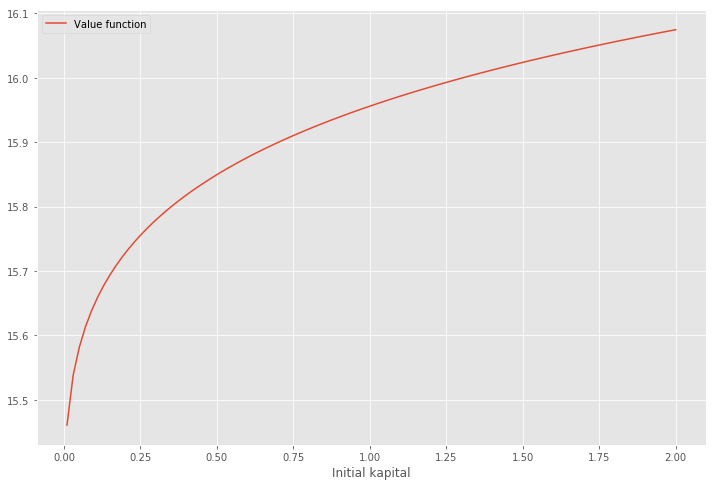

In [83]:
def plot1D():
    plt.plot(k, V[-1], label='Value function')
    plt.legend()
    plt.rcParams["figure.figsize"] = (12,8)
    plt.xlabel('Initial kapital')
    
plot1D()

# 1 e) concavity of the value function and monotonicity of the decision rule

In [132]:
%%time
# p = 100 , k_max = 2 ====>>> 1,5 sekund

k_min = 0.01
k_max = 2
p = 50

#Step 1
k = np.linspace(k_min, k_max, p) #The continuous variable k is discretized by defining a grid for the values of k

#Step 2
V = []
V.append(np.zeros(p)) #Guess a solution
V.append(np.zeros(p))
k_dec = []
k_dec.append(np.zeros(p))

kj_dec = []
kj_dec.append(np.zeros(p))


#Step 3
#Define the return matrix M
M = [0]*p
Chi = [0]*p
for i in range(p):
    M[i] = [0] * p
    Chi[i] = [0] * p
    
    
for i in range(p):
    for j in range(p):
        M[i][j] = m(k[i], k[j])



for i in range(p):
    for j in range(p):
        Chi[i][j] = M[i][j] + beta* V[-1][j]

#STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
V_new = [0]*p
k_dec_new = [0]*p
for i in range(p):
    V_new[i]=max(Chi[i])
    #k_dec_new[i] = argmax(Chi[i])

V.append(V_new)

#check = True

while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 0.01): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
    #check = False
    #STEP 5.1: Compute the matrix, χ
    for i in range(p):
        j=0
        while j<p:
            if k[j]>=k_dec[-1][j]:
                Chi[i][j] =M[i][j] + beta* V[-1][j]
                if j>0:
                    if Chi[i][j]<Chi[i][j-1]:
                        j=p
                j = j+1

    
    #STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
    V_new = [0]*p
    k_dec_new = [0]*p
    for i in range(p):
        V_new[i]=max(Chi[i])
        #k_dec_new[i] = argmax(Chi[i])

    V.append(V_new)
    #k_dec.append(Chi.argmax(1))
    #kj_dec.append(k[k_dec[-1]])

Wall time: 348 ms


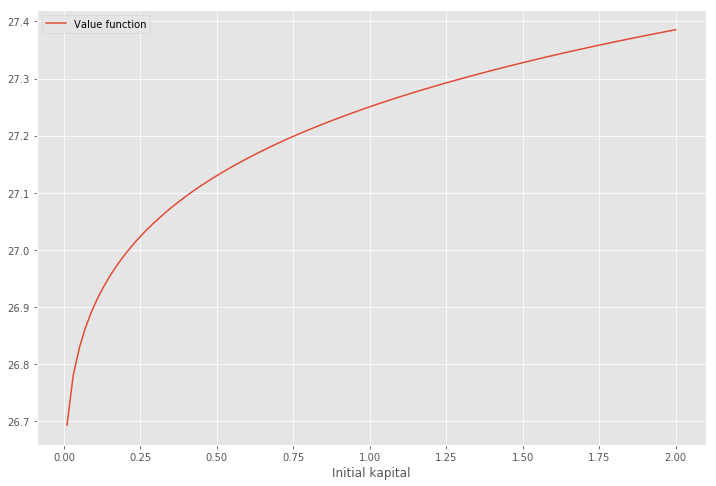

In [86]:
def plot1E():
    plt.plot(k, V[-1], label='Value function')
    plt.legend()
    plt.rcParams["figure.figsize"] = (12,8)
    plt.xlabel('Initial kapital')
    
plot1E()

# Time of execution:
| method\policy iterations | 5 | 10 | 20 | 50|
| --- | --- | --- | --- | --- |
| Brut Force | 27ms | 107ms | 445ms | 2.9s |
| Monotonicity | 16.3ms | 50.6ms| 239ms | 1.26s |
| Concavity | 14.2ms | 23.9ms | 54.6ms | 244ms |
| Local Search | 20.3ms | 24.6ms | 40.8ms | 226ms |
| Concavity+Monotonicity | 14.6ms | 28.5ms | 64.2ms | 348ms |